In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that always relevant like recipes or reviews (as opposed to current events)
- Look at some examples

In [16]:
data = pd.read_csv('train.csv', sep='\t', na_values={'is_news' : '?'}).fillna(0)

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-predicts-holographic-calls-air-breathing-batteries-by-2015.html,4042,"{""title"":""IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries"",""body"":""A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1.0,1,24,0,5424,170,8,0.152941,0.079130,0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose Califor...
1,http://www.popsci.com/technology/article/2012-07/electronic-futuristic-starting-gun-eliminates-advantages-races,8471,"{""title"":""The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races"",""body"":""And that can be carried on a pla...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1.0,1,40,0,4973,187,9,0.181818,0.125448,1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",And that can be carried on a plane without the hassle too The Omega E Gun Starting Pistol Omega It s easy to take for granted just how insanely close some Olympic races are and how much the minutiae of it all can matter The perfect example is the traditional starting gun Seems easy You pull a tr...
2,http://www.menshealth.com/health/flu-fighting-fruits?cm_mmc=Facebook-_-MensHealth-_-Content-Health-_-FightFluWithFruit,1164,"{""title"":""Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health"",""body"":""Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent hea...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1.0,1,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,Apples The most popular source of antioxidants in our diet one apple has an antioxidant effect equivalent to 1 500 mg of vitamin C Apples are loaded with protective flavonoids which may prevent heart disease and cancer Next Papayas With 250 percent of the RDA of vitamin C a papaya can help kick ...
3,http://www.dumblittleman.com/2007/12/10-foolproof-tips-for-better-sleep.html,6684,"{""title"":""10 Foolproof Tips for Better Sleep "",""body"":""There was a period in my life when I had a lot of problems with sleep It took me very long to fall asleep I was easily awaken and I simply wasn t getting enough of rest at night I didn t want to take medication and this led me to learn sever...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1.0,0,24,0,2737,1

In [3]:
data[['title', 'label']].head()

,title,label
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",0
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",1
2,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,1
3,10 Foolproof Tips for Better Sleep,1
4,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,0


#### Does being a news site effect green-ness?

No it does not. It is a 50% chance for both is news and is not news to be green


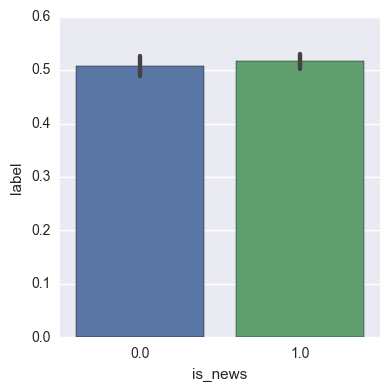

In [17]:
# TODO. Hint: use factorplot from seaborn.
print "No it does not. It is a 50% chance for both is news and is not news to be green"
sns.factorplot(data=data, x='is_news', y='label', kind='bar')
plt.show()

#### Does the website category effect green-ness?

Yes - the values vary based on the category. For example business has much more green words than weatheror sports.


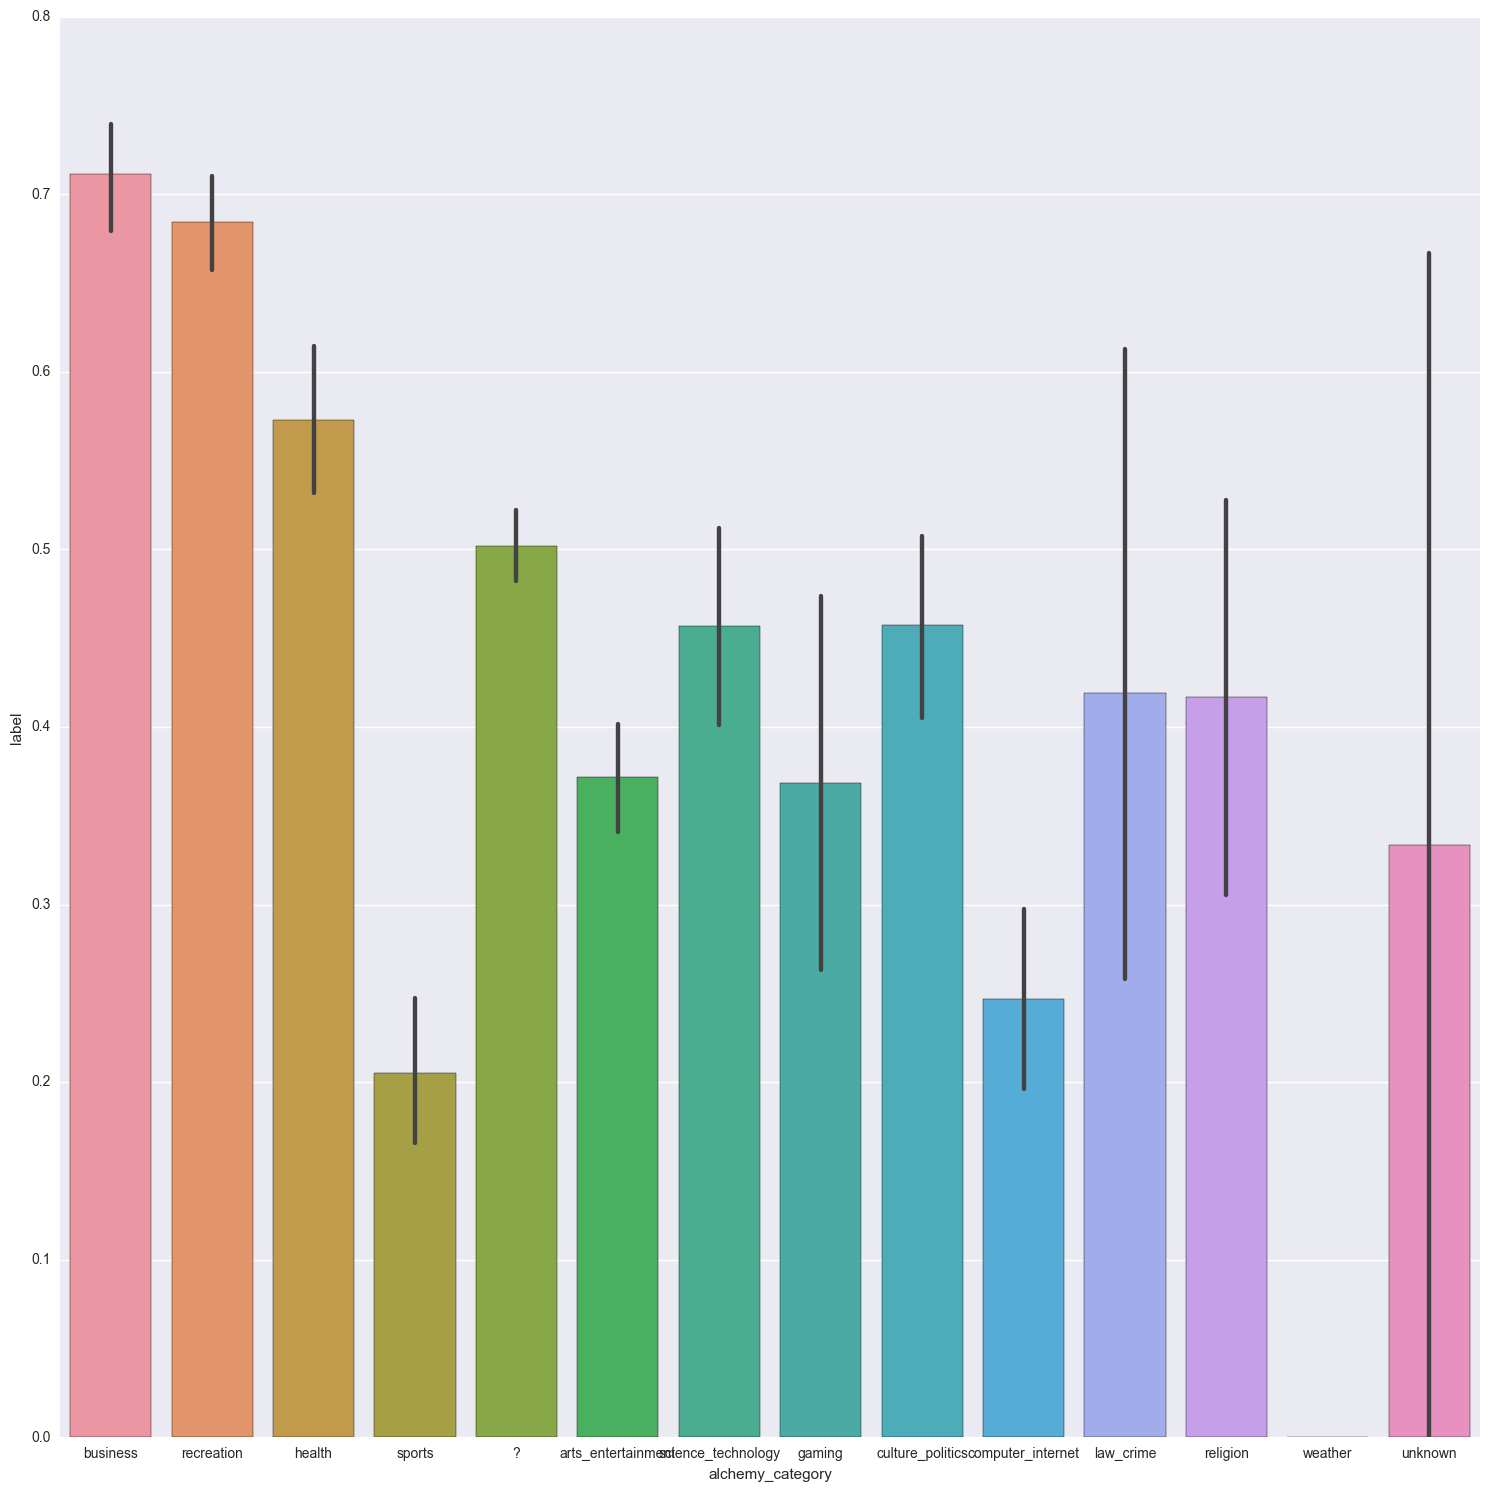

In [9]:
# TODO
print "Yes - the values vary based on the category. For example business has much more green words than weatheror sports."
sns.factorplot(data=data, x='alchemy_category', y='label', kind='bar', size = (15))
plt.show()

#### Does the image ratio effect green-ness?

Yes. The is .05 or 21% larger for non-green words.


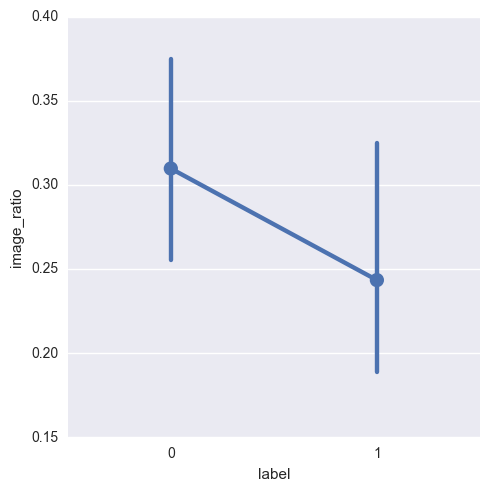

In [10]:
# TODO
print "Yes. The is .05 or 21% larger for non-green words."
g = sns.factorplot(data=data, x='label', y='image_ratio', size=5, kind='point')
g.despine(left=True)
plt.show()

#### Fit a logistic regression model using statsmodels
- Test different features that may be valuable
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [18]:
import statsmodels.formula.api as sm

model = sm.logit("label ~ alchemy_category + is_news",data = data).fit()

model.summary()

         Current function value: 0.649220
         Iterations: 35


/Users/Madballa55/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7380
Method:                           MLE   Df Model:                           14
Date:                Wed, 02 Nov 2016   Pseudo R-squ.:                 0.06289
Time:                        14:31:10   Log-Likelihood:                -4801.0
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                1.826e-128
==========================================================================================================
                                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.0319      0.047     -0.683      0.495        -0.124     0.060
alchemy_category[T.arts_entertainment]    -0.5646      0.081     -6.968      0.000        -0.723    -0.406
alchemy_category[T.business]               0.8686      0.086     10.083      0.000         0.700     1.037
alchemy_category[T.computer_internet]     -1.1567      0.142     -8.140      0.000        -1.435    -0.878
alchemy_category[T.culture_politics]      -0.2055      0.117     -1.757      0.079        -0.435     0.024
alchemy_category[T.gaming]                -0.5693      0.242     -2.355      0.019        -1.043    -0.096
alchemy_category[T.health]                 0.2613      0.100      2.617      0.009         0.066     0.457
alchemy_category[T.law_crime]             -0.3588      0.367     -0.979      0.328        -1.077     0.360
alchemy_category[T.recreation]             0.7415      0.075      9.879      0.000         0.594     0.889
alchemy_category[T.religion]              -0.3661      0.243     -1.507      0.132        -0.842     0.110
alchemy_category[T.science_technology]    -0.2131      0.126     -1.688      0.091        -0.461     0.034
alchemy_category[T.sports]                -1.3954      0.135    -10.351      0.000        -1.660    -1.131
alchemy_category[T.unknown]               -0.7257      0.867     -0.837      0.403        -2.426     0.974
alchemy_category[T.weather]              -18.3247   4724.670     -0.004      0.997     -9278.508  9241.858
is_news                                    0.0961      0.052      1.853      0.064        -0.006     0.198
==========================================================================================================
"""

#### Fit a logistic regression model using statsmodels with text features
- Add text features that may be useful, add this to the model and see if they improve the fit
- Examine the coefficients, does the feature increase or decrease the effect of being evergreen?

In [21]:
# EXAMPLE text feature 'recipe'
data['is_recipe'] = data['title'].fillna('').str.contains('recipe')


In [22]:
print "Yes - recipe greatly increases the chance of the "
model = sm.logit("label ~ alchemy_category + is_news + is_recipe",data = data).fit()

model.summary()

         Current function value: 0.637676
         Iterations: 35


/Users/Madballa55/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7379
Method:                           MLE   Df Model:                           15
Date:                Wed, 02 Nov 2016   Pseudo R-squ.:                 0.07956
Time:                        14:48:04   Log-Likelihood:                -4715.6
converged:                      False   LL-Null:                       -5123.2
                                        LLR p-value:                4.901e-164
==========================================================================================================
                                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.1065      0.047     -2.243      0.025        -0.199    -0.013
alchemy_category[T.arts_entertainment]    -0.5640      0.082     -6.908      0.000        -0.724    -0.404
alchemy_category[T.business]               0.7791      0.087      8.908      0.000         0.608     0.951
alchemy_category[T.computer_internet]     -1.2273      0.145     -8.473      0.000        -1.511    -0.943
alchemy_category[T.culture_politics]      -0.2724      0.119     -2.286      0.022        -0.506    -0.039
alchemy_category[T.gaming]                -0.5857      0.244     -2.397      0.017        -1.065    -0.107
alchemy_category[T.health]                 0.2879      0.100      2.875      0.004         0.092     0.484
alchemy_category[T.law_crime]             -0.3274      0.367     -0.893      0.372        -1.046     0.392
alchemy_category[T.recreation]             0.6345      0.076      8.300      0.000         0.485     0.784
alchemy_category[T.religion]              -0.3806      0.245     -1.551      0.121        -0.862     0.100
alchemy_category[T.science_technology]    -0.2080      0.127     -1.639      0.101        -0.457     0.041
alchemy_category[T.sports]                -1.3769      0.135    -10.182      0.000        -1.642    -1.112
alchemy_category[T.unknown]               -0.6939      0.868     -0.800      0.424        -2.395     1.007
alchemy_category[T.weather]              -21.0921   1.92e+04     -0.001      0.999     -3.77e+04  3.77e+04
is_recipe[T.True]                          1.9189      0.178     10.756      0.000         1.569     2.269
is_news                                    0.1594      0.053      3.020      0.003         0.056     0.263
==========================================================================================================
"""